In [1]:
import numpy as np
from openpyxl.styles.builtins import total
from scipy.optimize import minimize, NonlinearConstraint
from scipy.special import kl_div
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt


In [3]:
def _kl_distance(x, y):
    d = np.zeros(x.size, dtype=x.dtype)
    for i in range(x.size):
        d[i] = kl_div(x[i], y[i])
    return d[0]

def _wasserstein_distance(x, y, *args):
    return wasserstein_distance(x, y, *args)

def distance(x, y, *args):
    return _wasserstein_distance(x, y, *args)

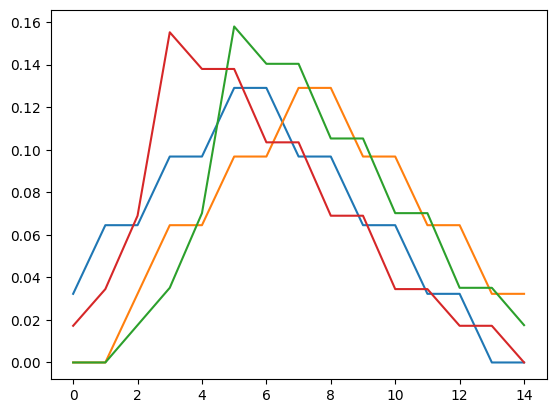

In [4]:
X = np.array([
    [1, 2, 2, 3, 3, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0],
    [0, 0, 1, 2, 2, 3, 3, 4, 4, 3, 3, 2, 2, 1, 1],
    [0, 0, 1, 2, 4, 9, 8, 8, 6, 6, 4, 4, 2, 2, 1],
    [1, 2, 4, 9, 8, 8, 6, 6, 4, 4, 2, 2, 1, 1, 0],
], dtype=np.float64)

X /= X.sum(axis=1, keepdims=True)

for x in X:
    plt.plot(x)

In [5]:
N, K = X.shape

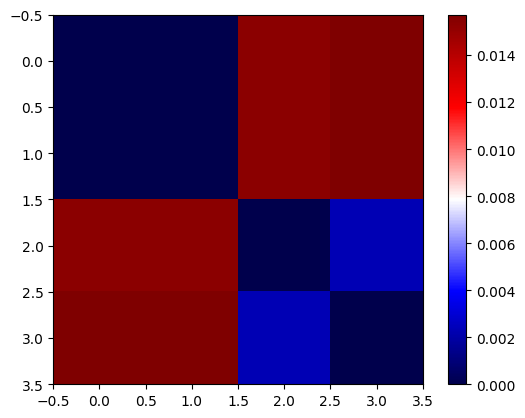

In [6]:
distances = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        distances[i, j] = distance(X[i, :], X[j, :]) 
plt.imshow(distances, cmap="seismic")
plt.colorbar()
plt.show()


In [7]:
def objective(y, X):
    yn = y / y.sum()
    N, K = X.shape
    total_distance = 0
    for i in range(N):
        total_distance += distance(yn, X[i, :])
    # total_distance += distance(yn, X.mean(axis=0))
    return total_distance

In [43]:
rng = np.random.default_rng(42)

# y0 = rng.uniform(size=K)

# y0 = np.ones(K)

y0 = np.abs(np.arange(-K/2, K/2))
y0 = y0.max() - y0

y0 /= y0.sum()

In [44]:
result = minimize(objective, y0, 
                  args=X,
                  constraints=
                  {
                      "type": "eq",
                      "fun": lambda x: x.sum() - 1.0,
                  },
                  method="SLSQP",
                  tol=1e-14,
                  options={"finite_diff_rel_step": 1e-9}
                  )
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.031039038454206747
       x: [-4.732e-09 -3.624e-09 ...  3.956e-02  1.845e-02]
     nit: 34
     jac: [ 6.311e-03  3.607e-02 ... -2.095e-09 -2.095e-09]
    nfev: 651
    njev: 34

In [45]:
y = result.x
print(y.sum())
# y /= y.sum()

1.0


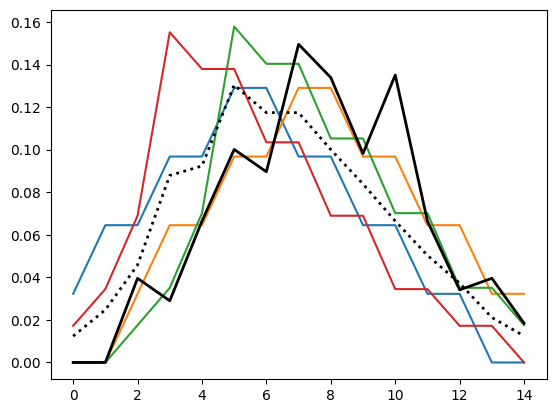

In [46]:
for x in X:
    plt.plot(x)
plt.plot(X.mean(axis=0), c="k", ls=":", lw=2.0)
plt.plot(y, c="k", lw=2.0)
plt.show()